<a href="https://colab.research.google.com/github/parikshithsivakumar/NeuralNetworkandDeepLearning/blob/main/Lab101112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive (2).zip'
extract_path = '/content/minet'

# Unzip dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [3]:
!pip install tensorflow==2.12.0

In [4]:
import os

for root, dirs, files in os.walk("/content/minet/minet/biotite"):
    print("Directory:", root)
    print("Subfolders:", dirs)
    print("Number of images:", len(files))
    break


Directory: /content/minet/minet/biotite
Subfolders: []
Number of images: 68


In [5]:
dataset_path = '/content/minet/minet'


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 768 images belonging to 7 classes.
Found 189 images belonging to 7 classes.


In [7]:
import numpy as np

def extract_sequences(generator):
    X_seq, y_seq = [], []
    for batch_x, batch_y in generator:
        seq_x = batch_x.reshape(batch_x.shape[0], -1, 1)  # Flatten and reshape
        X_seq.extend(seq_x)
        y_seq.extend(batch_y)
        if len(X_seq) >= generator.samples:
            break
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = extract_sequences(train_data)
X_val_seq, y_val_seq = extract_sequences(val_data)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def build_rnn(input_shape, num_classes):
    model = Sequential([
        SimpleRNN(64, input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

rnn_model = build_rnn(X_train_seq.shape[1:], y_train_seq.shape[1])
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rnn_model.fit(X_train_seq, y_train_seq, epochs=10, validation_data=(X_val_seq, y_val_seq))


Epoch 1/10
24/24 [==============================] - 133s 6s/step - loss: 1.9001 - accuracy: 0.2357 - val_loss: 1.8663 - val_accuracy: 0.2487
Epoch 2/10
24/24 [==============================] - 145s 6s/step - loss: 1.8644 - accuracy: 0.2461 - val_loss: 1.8547 - val_accuracy: 0.2487
Epoch 3/10
24/24 [==============================] - 146s 6s/step - loss: 1.8581 - accuracy: 0.2487 - val_loss: 1.8480 - val_accuracy: 0.2487
Epoch 4/10
24/24 [==============================] - 146s 6s/step - loss: 1.8562 - accuracy: 0.2383 - val_loss: 1.8423 - val_accuracy: 0.2487
Epoch 5/10
24/24 [==============================] - 139s 6s/step - loss: 1.8521 - accuracy: 0.2565 - val_loss: 1.8428 - val_accuracy: 0.2698
Epoch 6/10
24/24 [==============================] - 134s 6s/step - loss: 1.8482 - accuracy: 0.2565 - val_loss: 1.8436 - val_accuracy: 0.2593
Epoch 7/10
24/24 [==============================] - 135s 6s/step - loss: 1.8445 - accuracy: 0.2682 - val_loss: 1.8434 - val_accuracy: 0.2698
Epoch 8/10
24

In [9]:
from tensorflow.keras.layers import Bidirectional

def build_birnn(input_shape, num_classes):
    model = Sequential([
        Bidirectional(SimpleRNN(64), input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

birnn_model = build_birnn(X_train_seq.shape[1:], y_train_seq.shape[1])
birnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

birnn_model.fit(X_train_seq, y_train_seq, epochs=10, validation_data=(X_val_seq, y_val_seq))


Epoch 1/10
24/24 [==============================] - 220s 9s/step - loss: 1.8948 - accuracy: 0.2240 - val_loss: 1.8656 - val_accuracy: 0.1958
Epoch 2/10
24/24 [==============================] - 218s 9s/step - loss: 1.8768 - accuracy: 0.2227 - val_loss: 1.8531 - val_accuracy: 0.2434
Epoch 3/10
24/24 [==============================] - 218s 9s/step - loss: 1.8721 - accuracy: 0.2318 - val_loss: 1.8442 - val_accuracy: 0.2963
Epoch 4/10
24/24 [==============================] - 220s 9s/step - loss: 1.8592 - accuracy: 0.2656 - val_loss: 1.8490 - val_accuracy: 0.2487
Epoch 5/10
24/24 [==============================] - 218s 9s/step - loss: 1.8729 - accuracy: 0.2435 - val_loss: 1.8701 - val_accuracy: 0.2328
Epoch 6/10
24/24 [==============================] - 218s 9s/step - loss: 1.8942 - accuracy: 0.2018 - val_loss: 1.8529 - val_accuracy: 0.2381
Epoch 7/10
24/24 [==============================] - 216s 9s/step - loss: 1.8678 - accuracy: 0.2422 - val_loss: 1.8496 - val_accuracy: 0.2434
Epoch 8/10
24

In [10]:
from tensorflow.keras.layers import LSTM

def build_lstm(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

lstm_model = build_lstm(X_train_seq.shape[1:], y_train_seq.shape[1])
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_seq, y_train_seq, epochs=10, validation_data=(X_val_seq, y_val_seq))


Epoch 1/10
24/24 [==============================] - 377s 16s/step - loss: 1.9072 - accuracy: 0.2461 - val_loss: 1.8601 - val_accuracy: 0.2487
Epoch 2/10
24/24 [==============================] - 354s 15s/step - loss: 1.8750 - accuracy: 0.2448 - val_loss: 1.8571 - val_accuracy: 0.2487
Epoch 3/10
24/24 [==============================] - 370s 15s/step - loss: 1.8683 - accuracy: 0.2448 - val_loss: 1.8540 - val_accuracy: 0.2487
Epoch 4/10
24/24 [==============================] - 367s 15s/step - loss: 1.8628 - accuracy: 0.2474 - val_loss: 1.8492 - val_accuracy: 0.2487
Epoch 5/10
24/24 [==============================] - 374s 16s/step - loss: 1.8550 - accuracy: 0.2474 - val_loss: 1.8651 - val_accuracy: 0.2751
Epoch 6/10
24/24 [==============================] - 358s 15s/step - loss: 1.8691 - accuracy: 0.2370 - val_loss: 1.8527 - val_accuracy: 0.2487
Epoch 7/10
24/24 [==============================] - 358s 15s/step - loss: 1.8575 - accuracy: 0.2422 - val_loss: 1.8508 - val_accuracy: 0.2487
Epoch 

6/6 [==============================] - 11s 2s/step

🔎 Classification Report - Simple RNN
              precision    recall  f1-score   support

     biotite       0.00      0.00      0.00        13
     bornite       0.00      0.00      0.00        34
 chrysocolla       0.00      0.00      0.00        32
   malachite       0.26      0.91      0.40        47
   muscovite       0.00      0.00      0.00        15
      pyrite       0.00      0.00      0.00        19
      quartz       0.36      0.28      0.31        29

    accuracy                           0.27       189
   macro avg       0.09      0.17      0.10       189
weighted avg       0.12      0.27      0.15       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


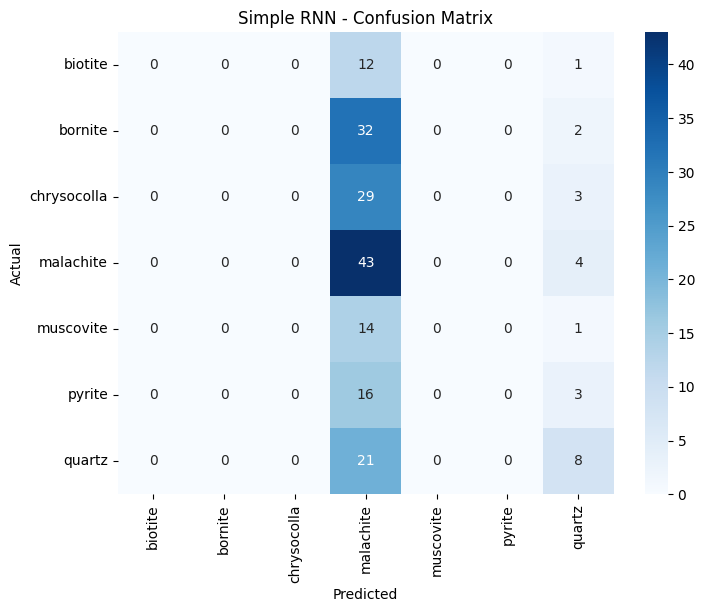

6/6 [==============================] - 19s 3s/step

🔎 Classification Report - Bidirectional RNN
              precision    recall  f1-score   support

     biotite       0.00      0.00      0.00        13
     bornite       0.16      0.35      0.22        34
 chrysocolla       0.00      0.00      0.00        32
   malachite       0.27      0.51      0.35        47
   muscovite       0.00      0.00      0.00        15
      pyrite       0.00      0.00      0.00        19
      quartz       0.20      0.17      0.19        29

    accuracy                           0.22       189
   macro avg       0.09      0.15      0.11       189
weighted avg       0.13      0.22      0.16       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


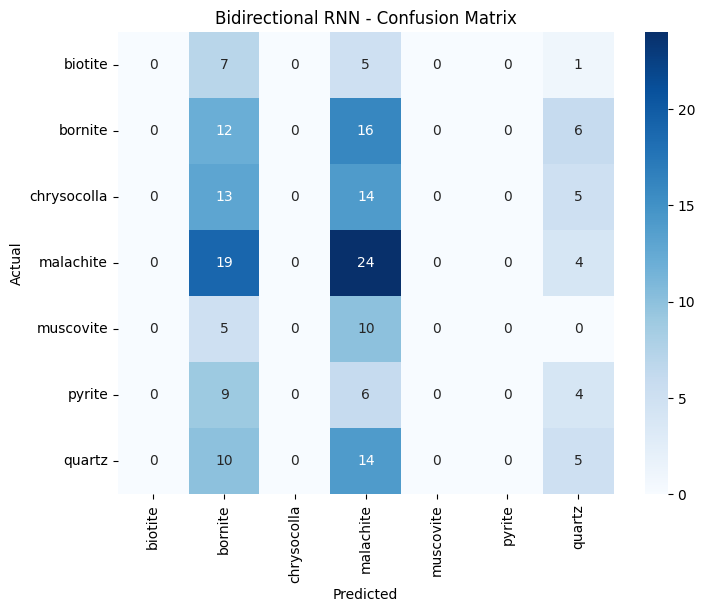

6/6 [==============================] - 31s 5s/step

🔎 Classification Report - LSTM
              precision    recall  f1-score   support

     biotite       0.00      0.00      0.00        13
     bornite       0.00      0.00      0.00        34
 chrysocolla       0.00      0.00      0.00        32
   malachite       0.26      0.81      0.39        47
   muscovite       0.00      0.00      0.00        15
      pyrite       0.00      0.00      0.00        19
      quartz       0.28      0.41      0.33        29

    accuracy                           0.26       189
   macro avg       0.08      0.17      0.10       189
weighted avg       0.11      0.26      0.15       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


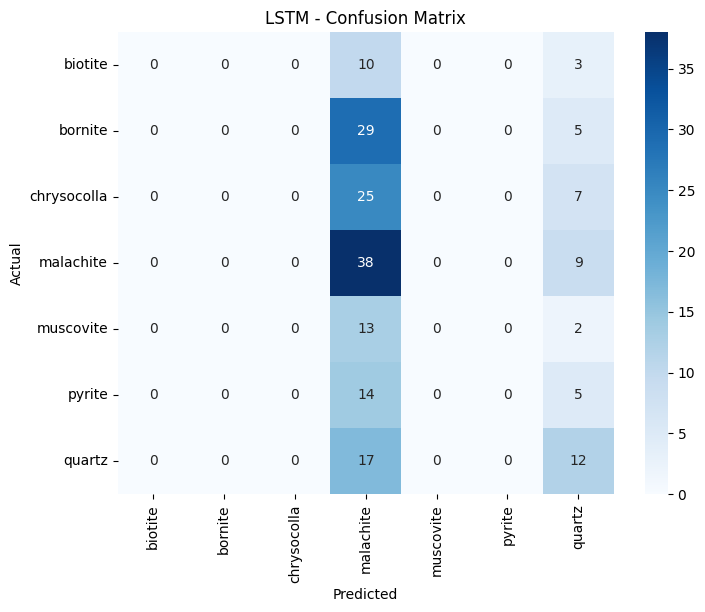

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_val, y_val, class_names, model_name="Model"):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    y_true = np.argmax(y_val, axis=1)

    print(f"\n🔎 Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Use class names from the validation generator
class_names = list(val_data.class_indices.keys())

evaluate_model(rnn_model, X_val_seq, y_val_seq, class_names, "Simple RNN")
evaluate_model(birnn_model, X_val_seq, y_val_seq, class_names, "Bidirectional RNN")
evaluate_model(lstm_model, X_val_seq, y_val_seq, class_names, "LSTM")


In [14]:
def plot_accuracy(history_obj, label):
    history_dict = history_obj.history
    acc_key = 'accuracy' if 'accuracy' in history_dict else 'acc'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history_dict else 'val_acc'

    plt.plot(history_dict[acc_key], label=f'{label} Train')
    plt.plot(history_dict[val_acc_key], label=f'{label} Val')


In [15]:
plt.figure(figsize=(10, 5))
plot_accuracy(rnn_model.history, "RNN")
plot_accuracy(birnn_model.history, "BiRNN")
plot_accuracy(lstm_model.history, "LSTM")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'acc'

<Figure size 1000x500 with 0 Axes>